# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [4]:
def gerar_bivariada(df: pd.DataFrame, variavel_resposta: str, variavel_explicativa: str):

    stats = pd.crosstab(df[variavel_explicativa], df[variavel_resposta], margins=True)
    stats['media_doentes'] = stats[1]/stats['All']
    stats['Odds'] = stats[1]/stats[0]
    stats['Odds_ratio'] = stats['Odds']/stats.loc['All', 'Odds']
    stats['log_odds'] = np.log(stats['Odds'])
    stats['WOE'] = np.log(stats['Odds_ratio'])
    return stats

In [5]:
stats1 = gerar_bivariada(df, 'flag_doente', 'cp' )
stats1

flag_doente,0,1,All,media_doentes,Odds,Odds_ratio,log_odds,WOE
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,0.729167,2.692308,3.176536,0.990399,1.155791
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [6]:
stats2 = gerar_bivariada(df, 'flag_doente','restecg')
stats2

flag_doente,0,1,All,media_doentes,Odds,Odds_ratio,log_odds,WOE
restecg,,,,,,,,
0.0,95,56,151,0.370861,0.589474,0.695494,-0.528525,-0.363133
1.0,1,3,4,0.750000,3.000000,3.539568,1.098612,1.264005
2.0,68,80,148,0.540541,1.176471,1.388066,0.162519,0.327911
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [7]:
stat3 = gerar_bivariada(df, 'flag_doente', 'slope')
stat3

flag_doente,0,1,All,media_doentes,Odds,Odds_ratio,log_odds,WOE
slope,,,,,,,,
1.0,106,36,142,0.253521,0.339623,0.400706,-1.079920,-0.914528
2.0,49,91,140,0.650000,1.857143,2.191161,0.619039,0.784432
3.0,9,12,21,0.571429,1.333333,1.573141,0.287682,0.453075
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


 Das tres variaveis escolhidas, 'cp' aparenta ser a melhor discriminadora das demais, pois possui maiores diferenças em media_doentes, Odds, Odds_ratio e WOE em suas categorias. Uma dispersão maior nesses valores indica uma associação mais forte com a variável de resposta.

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [8]:
def gerar_bivariada_continua(df: pd.DataFrame, variavel_resposta: str, variavel_explicativa: str, num_categorias: int = 5):
    
    variavel_explicativa_cat = variavel_explicativa + '_cat'
    df[variavel_explicativa_cat] = pd.cut(df[variavel_explicativa], bins=num_categorias, labels=False)
    
    stats = pd.crosstab(df[variavel_explicativa], df[variavel_resposta], margins=True)
    stats['media_doentes'] = stats[1]/stats['All']
    stats['Odds'] = stats[1]/stats[0]
    stats['Odds_ratio'] = stats['Odds']/stats.loc['All', 'Odds']
    stats['log_odds'] = np.log(stats['Odds'])
    stats['WOE'] = np.log(stats['Odds_ratio'])

    return stats

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [9]:
formula = 'flag_doente ~ age + sex + trestbps'

model = smf.logit(formula=formula, data= df).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.607880
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      299
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Mar 2025   Pseudo R-squ.:                  0.1187
Time:                        11:03:09   Log-Likelihood:                -184.19
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 9.687e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4128      1.240     -5.173      0.000      -8.842      -3.983
age            0.0588      0.015      3.853      0.000       0.029       0.089
sex            1.5518      0.295      5.266      0.000       0.974       2.129
trestbps       0.0147      0.008      1.963      0.050    2.06e-05       0.029
==============================================================================
"""

- idade: 0,0588. Para cada ano de idade, o log_odds de ter doença cardíaca aumenta em 0,0588. Colocando na exponencial (e^0,0588) este valor dá aproximadamente 1,0606. Isso significa que para cada ano adicional de idade, as chances de ter doença cardíaca aumentam em cerca de 6,06%.

- sexo: 1,5518. Ser do sexo masculino aumenta o log_odds de ter doença cardiaca em 1,5518. Colocando na exponencial (e^1,5518) este valor dá aproximadamente 4,72. Isso significa que os homens têm cerca de 4,72 vezes mais probabilidade de ter doença cardíaca do que as mulheres.

- trestbps: 0,0147. Para cada aumento de trestbps (pressão arterial em repouso), a probabilidade logarítmica de ter uma doença cardíaca aumenta em 0,0147. Colocando na exponencial (e^0,0147) este valor dá aproximadamente 1,0148. Isso significa que para cada aumento de uma unidade na pressão arterial em repouso, as probabilidades de ter doença cardíaca aumentam em cerca de 1,48%.

- todas as variaveis possuem p >= a 0,05 sendo estaticamente relevantes.

Em resumo:

Idade avançada está associada a uma probabilidade maior de ter alguma doença cardíaca.
Ser homem está associado a uma probabilidade muito maior de ter alguma doença cardíaca.
Pressão arterial em repouso mais alta está ligeiramente associada a uma probabilidade maior de ter alguma doença cardíaca.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [10]:
df['predito'] = model.predict(df)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.727364
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.808076
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.700235
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.316617
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.110483


In [11]:
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

predito
(0.06, 0.284]     61
(0.284, 0.397]    60
(0.397, 0.528]    61
(0.528, 0.659]    60
(0.659, 0.857]    61
Name: count, dtype: int64

In [14]:
group_reg = df.groupby(cat_pred, observed=False)
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

,contagem
predito,
"(0.06, 0.284]",61
"(0.284, 0.397]",60
"(0.397, 0.528]",61
"(0.528, 0.659]",60
"(0.659, 0.857]",61


In [15]:
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.06, 0.284]",61,0.177307
"(0.284, 0.397]",60,0.345247
"(0.397, 0.528]",61,0.461927
"(0.528, 0.659]",60,0.588007
"(0.659, 0.857]",61,0.721500


In [16]:
qualid['pct_doentes'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doentes
predito,,,
"(0.06, 0.284]",61,0.177307,0.163934
"(0.284, 0.397]",60,0.345247,0.400000
"(0.397, 0.528]",61,0.461927,0.426230
"(0.528, 0.659]",60,0.588007,0.600000
"(0.659, 0.857]",61,0.721500,0.704918


As diferenças entre as colunas predito e pct_doentes são pequenas, com a maior variação de 5.5%. indicando que há uma boa correspondência entre previsão e realidade.

Text(0.5, 0, 'Grupo')

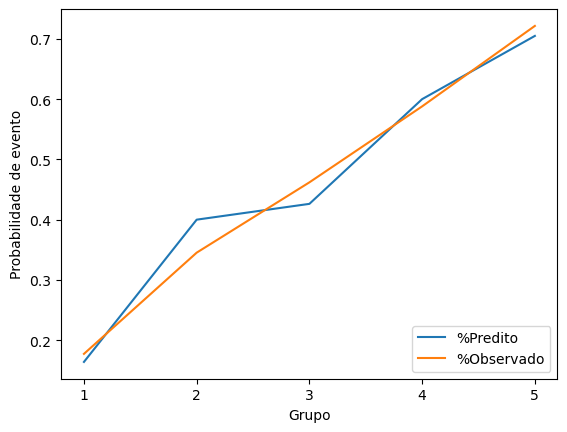

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doentes'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

As duas curvas são próximas, sugerindo que o modelo esta calibrado, com alguns desvios maiores do drupo 3 para baixo.

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

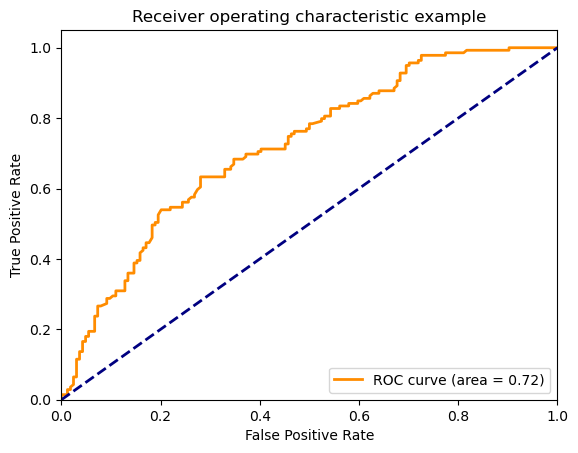

In [20]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



Text(0, 0.5, 'Função Distribuição Acumulada')

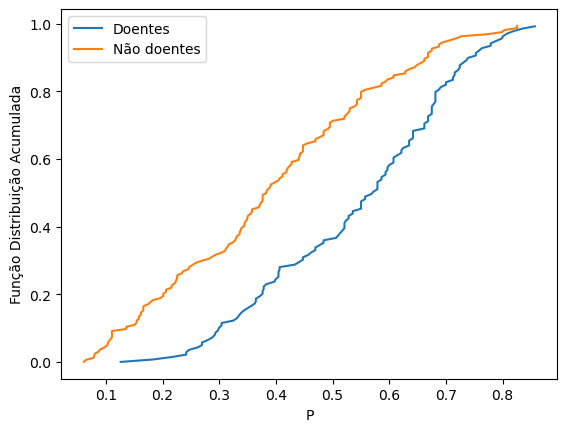

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doentes')

score_pop2 = df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Não doentes')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')


In [23]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%' .format(ks*100, auc_*100, gini*100))

Acurácia: 67.66%
KS: 35.26% 
AUC: 71.92% 
GINI: 43.84%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [38]:
formula = 'flag_doente ~ age + sex + trestbps + chol + cp'

model2 = smf.logit(formula=formula, data= df).fit()

df['predito2'] = model2.predict(df)
df.drop(columns=['predito'], inplace=True)

model2.summary()

Optimization terminated successfully.
         Current function value: 0.505812
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Mar 2025   Pseudo R-squ.:                  0.2667
Time:                        11:38:15   Log-Likelihood:                -153.26
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.013e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.0947      1.754     -6.896      0.000     -15.532      -8.657
age            0.0556      0.018      3.144      0.002       0.021       0.090
sex            1.9355      0.348      5.570      0.000       1.254       2.617
trestbps       0.0208      0.008      2.520      0.012       0.005       0.037
chol           0.0044      0.003      1.608      0.108      -0.001       0.010
cp             1.1417      0.170      6.708      0.000       0.808       1.475
==============================================================================
"""

In [45]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito2']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))
#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito2'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito2'], df.loc[df['flag_doente'] != 1, 'predito2']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%' .format(ks*100, auc_*100, gini*100))

Acurácia: 77.56%
KS: 57.30% 
AUC: 83.47% 
GINI: 66.93%


In [43]:
cat_pred2 = pd.qcut(df['predito2'], 5, duplicates='drop')
group_reg2 = df.groupby(cat_pred2, observed=False)
qualid2 = group_reg2[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid2['predito2'] = group_reg2['predito2'].mean()
qualid2['pct_doentes'] = group_reg2['flag_doente'].mean()

qualid2

,contagem,predito2,pct_doentes
predito2,,,
"(0.009600000000000001, 0.142]",61,0.070365,0.114754
"(0.142, 0.335]",60,0.251632,0.183333
"(0.335, 0.556]",61,0.455085,0.491803
"(0.556, 0.774]",60,0.676432,0.683333
"(0.774, 0.938]",61,0.840388,0.819672


Text(0, 0.5, 'Função Distribuição Acumulada')

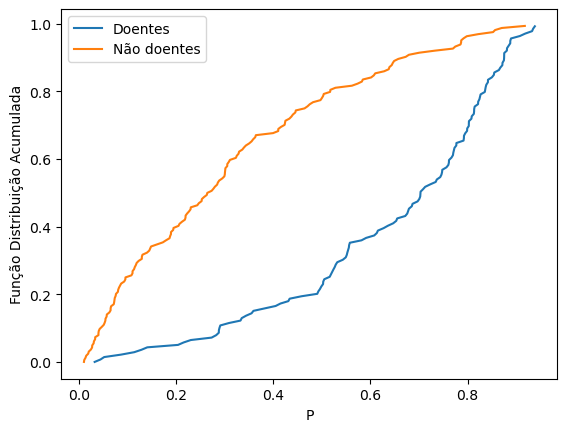

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito2']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doentes')

score_pop2 = df.loc[df['flag_doente']!=1,'predito2']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Não doentes')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')


Text(0.5, 0, 'Grupo')

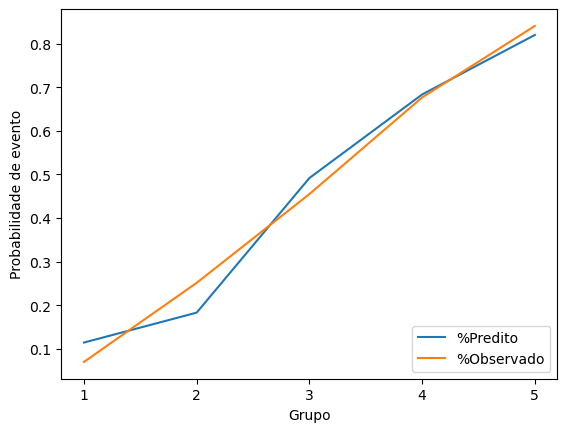

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid2['pct_doentes'].plot(label='%Predito')
ax = qualid2['predito2'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')